Import Required Packages

In [19]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense
from keras.utils.np_utils import to_categorical

In [20]:
#Declare and intialize our Sequetial Model
classifier = Sequential()

#Convolutional input layer, 32 feature maps with a size of 3*3 and a
#rectifier activation function (relu==rectified linear unit)
classifier.add(Convolution2D(32,3,3,input_shape=(32,32,3), activation = 'relu'))

In [21]:
#Dropout layer at 10%
classifier.add(Dropout(.1))

In [22]:
#Max pool layer with size 2*2
classifier.add(MaxPooling2D(pool_size = (2*2)))

#Flattern Layer
classifier.add(Flatten())

In [23]:
#Fully connected layer with 1024 units and a rectifer activation function
classifier.add(Dense(1024, activation = 'relu'))

#Fully connected layer with 512 units and a rectifer activation function
classifier.add(Dense(512, activation = 'relu'))

#Fully connected output layer with 5 units and a softmax activation function
classifier.add(Dense(5, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])

In [24]:
#Import google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [25]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

#use target_size parameter to convert images to 32*32 pixels

training_set = train_datagen.flow_from_directory(
    '/content/gdrive/MyDrive/colab_datasets/5_Categories_Flower_Recognition/dataset/training', target_size = (32,32),
    batch_size = 32, class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    '/content/gdrive/MyDrive/colab_datasets/5_Categories_Flower_Recognition/dataset/testing', target_size = (32,32),
    batch_size = 32, class_mode='categorical'
)

nb_train_samples = len(training_set.filenames)
num_classes = len(training_set.class_indices)

#get the class labels for the training data, in the original order
train_labels = training_set.classes 

Found 3238 images belonging to 5 classes.
Found 1079 images belonging to 5 classes.


In [26]:
from IPython.display import display
from PIL import Image

hist = classifier.fit_generator(training_set, steps_per_epoch=50,
                                epochs = 10, validation_data = test_set,
                                validation_steps= 10)

<ipython-input-26-f64acd16aee9>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = classifier.fit_generator(training_set, steps_per_epoch=50,


Epoch 1/10
50/50 [==============================] - 319s 6s/step - loss: 0.4802 - accuracy: 0.3304 - val_loss: 0.4162 - val_accuracy: 0.4781
Epoch 2/10
50/50 [==============================] - 278s 6s/step - loss: 0.3992 - accuracy: 0.4816 - val_loss: 0.3809 - val_accuracy: 0.5156
Epoch 3/10
50/50 [==============================] - 108s 2s/step - loss: 0.3724 - accuracy: 0.5213 - val_loss: 0.3906 - val_accuracy: 0.4938
Epoch 4/10
50/50 [==============================] - 57s 1s/step - loss: 0.3696 - accuracy: 0.5267 - val_loss: 0.3733 - val_accuracy: 0.5375
Epoch 5/10
50/50 [==============================] - 42s 842ms/step - loss: 0.3477 - accuracy: 0.5700 - val_loss: 0.3312 - val_accuracy: 0.5969
Epoch 6/10
50/50 [==============================] - 29s 585ms/step - loss: 0.3557 - accuracy: 0.5644 - val_loss: 0.3687 - val_accuracy: 0.5562
Epoch 7/10
50/50 [==============================] - 23s 465ms/step - loss: 0.3463 - accuracy: 0.5869 - val_loss: 0.3502 - val_accuracy: 0.5500
Epoch 8/

In [31]:
scores = classifier.evaluate(test_set)
print("\n%s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

print("Summary")
print(classifier.summary())

34/34 [==============================] - 5s 156ms/step - loss: 0.3576 - accuracy: 0.5728

accuracy: 57.28%
Summary
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        896       
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1024)              132096    
                                                                 
 dens

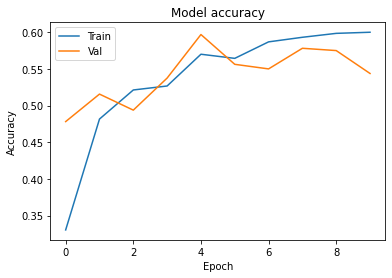

In [35]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

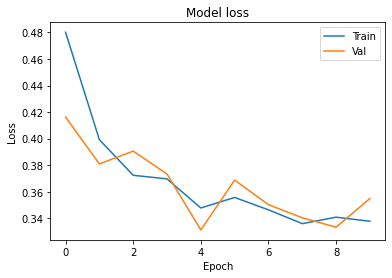

In [45]:
#visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [47]:
# serialize the model to disk
print("[INFO] saving Flower detection model...")
classifier.save("flower_recognition_model.h5")

[INFO] saving Flower detection model...
